#### Collecting data and splitting into training and testing

In [15]:
data_path = r"C:\Users\rng8\Downloads\archive (24)\H6"
train_folder = os.path.join(r"C:\Users\rng8\Downloads\archive (24)\trn", 'h6')
test_folder = os.path.join(r"C:\Users\rng8\Downloads\archive (24)\tst", 'h6')

image_extensions = ['.jpg']

imgs_list = [filename for filename in os.listdir(data_path) if os.path.splitext(filename)[-1] 
             in image_extensions]

random.seed(42)

random.shuffle(imgs_list)

train_size = int(len(imgs_list) * 0.7)
test_size = int(len(imgs_list) * 0.3)

for folder_path in [train_folder,test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

for i, f in enumerate(imgs_list):
    if i < train_size:
        dest_folder = train_folder
    else:
        dest_folder = test_folder
    shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

In [1]:
import os
import random
import shutil

In [36]:
trnn=image_dataset_from_directory(r"C:\Users\rng8\Downloads\archive (24)\trn",
                                 labels='inferred',label_mode="int",batch_size=32,image_size=(256,256))

Found 6377 files belonging to 5 classes.


In [4]:
from keras.utils import image_dataset_from_directory

In [17]:
tstt=image_dataset_from_directory(r"C:\Users\rng8\Downloads\archive (24)\tst",
                                 labels='inferred',label_mode="int",batch_size=32,image_size=(256,256))

Found 2737 files belonging to 5 classes.


#### Importing the important libraries

In [19]:
import tensorflow 
import keras 
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.models import Model,Sequential 
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt 
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping
from keras.regularizers import L2,L1
from keras.optimizers import Adam
import cv2 
import numpy as np

#### creating the resnet50 object in which we will add our own ANN layers

In [37]:
resnet=ResNet50(include_top=False,
    weights='imagenet',input_shape=(256,256,3))

#### Making the Layers trainable in the efnet model

In [38]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [39]:
print(len(resnet.layers))
resnet.layers

175


In [40]:
for i in resnet.layers:
    print(i.name,i.trainable)

input_3 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_block1

In [41]:
for i in resnet.layers:
    if i.name.startswith("conv1_"):
        i.trainable=False
    else:
        i.trainable =True

In [42]:
for i in resnet.layers:
    print(i.name,i.trainable)

input_3 True
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_bl

In [43]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

#### building the model using resnet50 

In [44]:
model=Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(units=5,activation="softmax"))

#### creating generators for training data and validation data which includes data augmentation as well 

In [45]:
train=ImageDataGenerator(rotation_range=90,horizontal_flip=True,
                         width_shift_range=0.5,
    height_shift_range=0.4,shear_range=0.2,
    zoom_range=0.5,rescale=1./256)
valid=ImageDataGenerator(rescale=1./256) 

#### using early stopping to reduce overfitting 

In [46]:
es=EarlyStopping(monitor="val_loss",min_delta=0.01,patience=3,start_from_epoch=4,verbose=1) 


#### compiling and training the model 

In [47]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics="accuracy")

In [48]:
history=model.fit(trnn,steps_per_epoch=125//8, epochs=10, validation_data=tstt,
                  validation_steps=25//8,callbacks=[es]) 

Epoch 1/10
15/15 [==============================] - 163s 10s/step - loss: 9.8203 - accuracy: 0.4250 - val_loss: 2695.0349 - val_accuracy: 0.1250
Epoch 2/10
15/15 [==============================] - 147s 10s/step - loss: 1.2151 - accuracy: 0.5250 - val_loss: 704.0782 - val_accuracy: 0.4375
Epoch 3/10
15/15 [==============================] - 152s 10s/step - loss: 1.0428 - accuracy: 0.6271 - val_loss: 21.9568 - val_accuracy: 0.4583
Epoch 4/10
15/15 [==============================] - 153s 10s/step - loss: 1.0644 - accuracy: 0.5479 - val_loss: 60.7950 - val_accuracy: 0.2604
Epoch 5/10
15/15 [==============================] - 151s 10s/step - loss: 1.0412 - accuracy: 0.5833 - val_loss: 9.6169 - val_accuracy: 0.2604
Epoch 6/10
15/15 [==============================] - 153s 10s/step - loss: 1.0327 - accuracy: 0.5917 - val_loss: 6.3806 - val_accuracy: 0.3229
Epoch 7/10
15/15 [==============================] - 149s 10s/step - loss: 1.0451 - accuracy: 0.5854 - val_loss: 1.2276 - val_accuracy: 0.5729

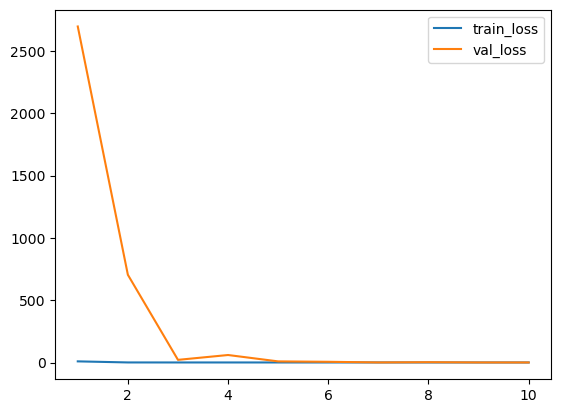

In [49]:
plt.plot(range(1,11),history.history["loss"],label="train_loss")
plt.plot(range(1,11),history.history["val_loss"],label="val_loss")
plt.legend()

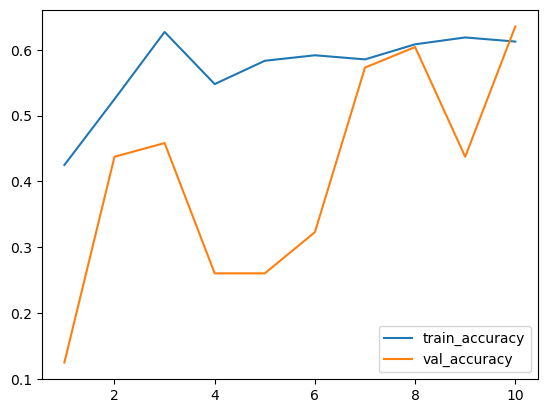

In [50]:
plt.plot(range(1,11),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,11),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

#### making predictions 

In [51]:
predicted=model.predict(tstt)
predicted 

86/86 [==============================] - 193s 2s/step


array([[1.35389841e-04, 2.36360729e-03, 3.72920334e-02, 9.58502531e-01,
        1.70640531e-03],
       [7.49513149e-01, 2.33490124e-01, 1.36583271e-02, 2.82694609e-03,
        5.11467981e-04],
       [8.41423929e-01, 1.51770204e-01, 4.73402720e-03, 1.79030106e-03,
        2.81538785e-04],
       ...,
       [7.72633374e-01, 2.12477431e-01, 1.29280295e-02, 1.63901248e-03,
        3.22073960e-04],
       [7.46246994e-01, 2.32885271e-01, 1.58941466e-02, 4.05438105e-03,
        9.19261132e-04],
       [8.89470452e-04, 6.53328979e-03, 1.04173474e-01, 8.83245409e-01,
        5.15835499e-03]], dtype=float32)

In [52]:
predicted=np.argmax(predicted,axis=1)
predicted

array([3, 0, 0, ..., 0, 0, 3], dtype=int64)

#### visualizing the output obtained at different convolutional layers

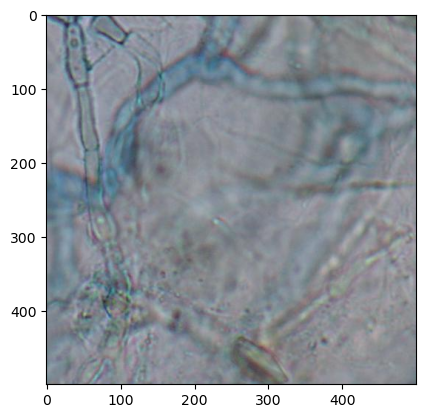

In [79]:
img=cv2.imread(r"C:\Users\rng8\Downloads\archive (24)\H6\H6_9a_6.jpg")
plt.imshow(img,cmap="gray")

In [80]:
img.shape

(500, 500, 3)

In [81]:
img=cv2.resize(img,(256,256))

In [82]:
img=img.reshape(1,256,256,3)

In [83]:
model1=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[1].output)

In [84]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
fm=model1.predict(img)

1/1 [==============================] - 0s 34ms/step


In [86]:
fm.shape

(1, 262, 262, 3)

In [87]:
len(cv2.split(fm[0]))

3

In [88]:
img2=(cv2.split(fm[0]))[0]

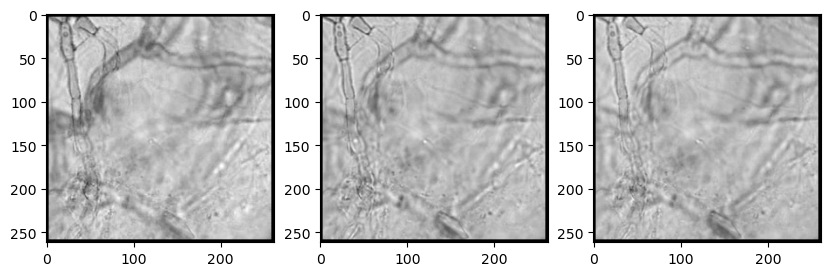

In [89]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm[0]))[2],cmap="gray") 

In [90]:
model2=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[6].output)

In [91]:
fm2=model2.predict(img)

1/1 [==============================] - 0s 48ms/step


In [92]:
fm2.shape

(1, 64, 64, 64)

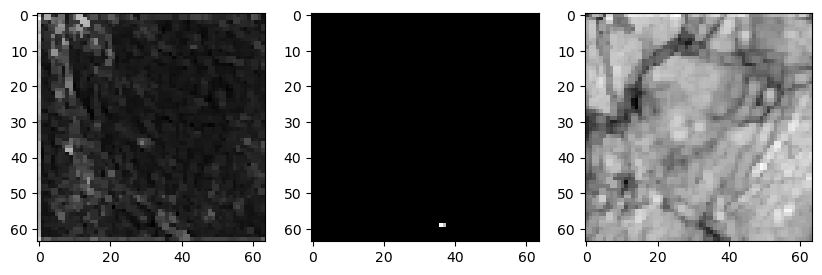

In [93]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm2[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm2[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm2[0]))[2],cmap="gray") 

In [94]:
model3=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[13].output)

In [95]:
fm3=model3.predict(img)

1/1 [==============================] - 0s 89ms/step


In [96]:
fm3.shape

(1, 64, 64, 256)

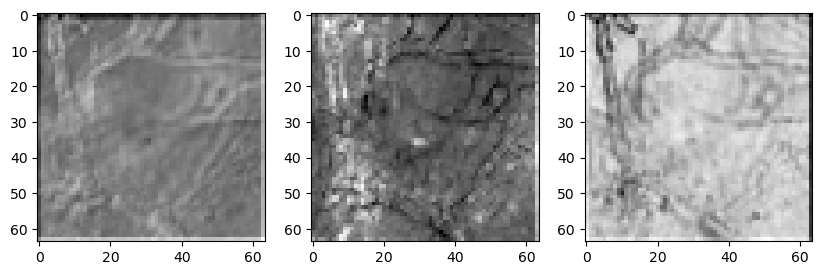

In [97]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm3[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm3[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm3[0]))[2],cmap="gray") 